In [49]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt 

rest = pd.read_csv("../../data_files/data_from_android_api/rest/rest_25_mins.csv")

up = pd.read_csv("../../data_files/data_from_android_api/up_down_still/up5mins_still.csv")
down = pd.read_csv("../../data_files/data_from_android_api/up_down_still/down5mins_still.csv")


dataDF = pd.concat([up, down])

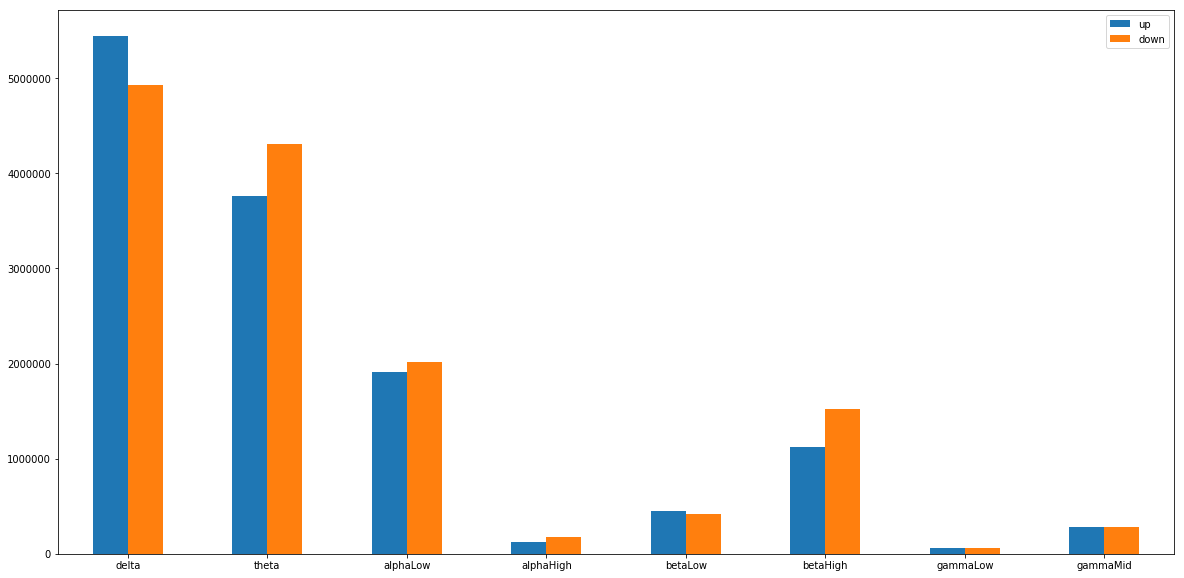

In [91]:
%matplotlib inline 
import matplotlib.pyplot as plt 

u = [up.delta.mean(), up.theta.mean(), up.alphaLow.mean(), 
     up.betaHigh.mean(), up.betaLow.mean(), up.alphaHigh.mean(), 
     up.gammaLow.mean(), up.gammaMid.mean()]

d = [down.delta.mean(), down.theta.mean(), down.alphaLow.mean(), 
     down.betaHigh.mean(), down.betaLow.mean(), down.alphaHigh.mean(), 
     down.gammaLow.mean(), down.gammaMid.mean()]


index = ['delta', 'theta', 'alphaLow','alphaHigh', 'betaLow', 'betaHigh', 'gammaLow', 'gammaMid']

df = pd.DataFrame({'up': u, 'down': d}, index=index)
ax = df.plot.bar(rot=0, figsize=(20,10))

In [50]:
# create an array of shape 30706, 9 = number of records by the features
data = np.array([[0 for x in range(8)] for y in range(len(dataDF))])
for i in range(len(dataDF)):
    data[i] = [dataDF.delta.values[i],
                       dataDF.theta.values[i],
                       dataDF.alphaLow.values[i],
                       dataDF.alphaHigh.values[i],
                       dataDF.betaLow.values[i],
                       dataDF.betaHigh.values[i],
                       dataDF.gammaLow.values[i],
                       dataDF.gammaMid.values[i]]
    
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
labels = encoder.fit_transform(dataDF.action.values)

# creating training and test sets
x_train, x_test, y_train, y_test = train_test_split(data, labels)

from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
stan_scaler = StandardScaler()

x_train = stan_scaler.fit_transform(x_train)
x_test = stan_scaler.transform(x_test)

all_data = dataDF.drop(['action'], axis=1)

/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [88]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Random Forrest
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

print(rfc.feature_importances_)

print("The score for Random Forest ", rfc.score(x_test, y_test))
y_pred = rfc.predict(x_test)
#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?
print(len(y_train))
print("Accuracy for x_test:", metrics.accuracy_score(y_test, y_pred))

scores = cross_val_score(rfc, all_data, labels, cv=10, scoring='accuracy')
print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

[0.12600197 0.12819726 0.11712773 0.09682568 0.10940296 0.147043
 0.14410301 0.1312984 ]
The score for Random Forest  0.43231441048034935
684
Accuracy for x_test: 0.43231441048034935
Cross Validation Accuracy: 0.37 (+/- 0.57)
[0.34408602 0.         0.01098901 0.02197802 0.08791209 0.63736264
 0.63736264 0.65934066 0.63736264 0.61538462]


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [89]:
# XGBoost
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train, y_train)
print(xgb)
print("The score for XGBoost ", xgb.score(x_test, y_test))
y_pred = xgb.predict(x_test)

print("Accuracy for x_test:", metrics.accuracy_score(y_test, y_pred))


predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
The score for XGBoost  0.5327510917030568
Accuracy for x_test: 0.5327510917030568
Accuracy: 53.28%


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 1)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
Epoch 1/7
684/684 [==============================] - 1s 1ms/step - loss: 0.7057 - acc: 0.5643
Epoch 2/7
684/684 [==============================] - 0s 227us/step - loss: 0.6873 - acc: 0.5789
Epoch 3/7
684/684 [==============================] - 0s 219us/step - loss: 0.6741 - acc: 0.5936
Epoch 4/7
684/684 [==============================] - 0s 195us/step - loss: 0.6648 - acc: 0.5921
Epoch 5/7
684/684 [==============================] - 0s 213us/step - loss: 0.6580 - acc: 0.5950
Epoch 6/7
684/684 [==============================] - 0s 195us/step - loss: 0.6531 - acc: 0.6418
Epoch 7/7
229/229 [==============================] - 0s 973us/step
loss and metrics [0.644248455893004

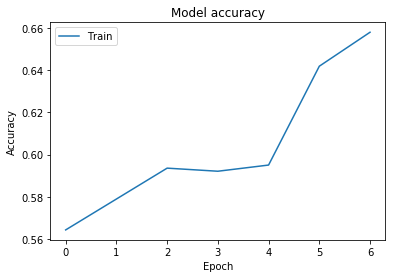

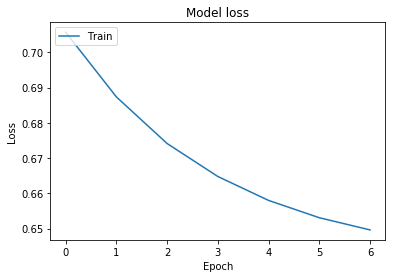

In [90]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
stan_scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

from keras import models
from keras import layers
# from keras import regularizers kernel_regularizer=regularizers.l2(0.01), 
from keras.optimizers import Adam

network = models.Sequential()

network.add(layers.Dense(1, input_shape=(8,), activation='sigmoid'))

# Adam = Adam(lr=0.05)
network.compile(optimizer='Adam',
                loss='binary_crossentropy',
                metrics=['acc'])

network.summary()

history = network.fit(x_train, y_train,
                      epochs=7, verbose=1, batch_size=5)

loss_and_metrics = network.evaluate(x_test, y_test)
print('loss and metrics', loss_and_metrics)

# print('prediction: ', network.predict(test_data))

%matplotlib inline 
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



In [92]:
all_labels = dataDF.action.values

encoder = LabelBinarizer()
all_labels = encoder.fit_transform(all_labels)
    
# create an array of shape 30706, 9 = number of records by the features
all_data = np.array([[0 for x in range(8)] for y in range(len(dataDF))])
for i in range(len(dataDF)):
    all_data[i] = [dataDF.delta.values[i],
                       dataDF.theta.values[i],
                       dataDF.alphaLow.values[i],
                       dataDF.alphaHigh.values[i],
                       dataDF.betaLow.values[i],
                       dataDF.betaHigh.values[i],
                       dataDF.gammaLow.values[i],
                       dataDF.gammaMid.values[i]]
    
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
stan_scaler = StandardScaler()

all_data = scaler.fit_transform(all_data)




/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [93]:

from keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import StratifiedKFold


skf = StratifiedKFold(n_splits=10, random_state=12)
avg_loss = []
avg_acc = []
# Loop through the indices the split() method returns
for index, (train_index, test_index) in enumerate(skf.split(all_data, labels)):
    print("Training on fold " + str(index + 1) + "/10.............................................")
    # Generate batches from indices
    x_train, x_test = all_data[train_index], all_data[test_index]
    # use one-hot vectors as labels
    y_train, y_test = labels[train_index], labels[test_index]

    network = models.Sequential()
    

    network.add(layers.Dense(32, input_shape=(8,)))
    network.add(layers.Dense(32, activation="relu"))
    network.add(layers.Dense(16, activation="relu"))
    # network.add(layers.Dropout(0.3))
    network.add(layers.Dense(16, activation="relu"))
    # network.add(layers.Dropout(0.3))
    network.add(layers.Dense(32, activation="sigmoid"))
    network.add(layers.Dense(1, activation='sigmoid'))

    # Adam = Adam(lr=0.05)
    network.compile(optimizer=Adam(lr=0.0004),
                    loss='binary_crossentropy',
                    metrics=['acc'])

    network.summary()

    history = network.fit(x_train, y_train, validation_split=0.2,
                          epochs=40, verbose=1, batch_size=3)

    loss, accuracy = network.evaluate(x_test, y_test)

    # evaluate and store the accuracy
#     loss, accuracy = model.evaluate(xtest_imagelist, ytest, verbose=1)
    avg_loss.append(loss)
    avg_acc.append(accuracy)

    # cross validation score
    print("Average accuracy of model on the dev set = ", np.mean(avg_acc))

Training on fold 1/10.............................................
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_52 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_53 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_54 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_55 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 33        
Total params: 2,721
Trainable params: 2,721
Non-trainable params: 0
_______

656/656 [==============================] - 0s 508us/step - loss: 0.6791 - acc: 0.5869 - val_loss: 0.5321 - val_acc: 1.0000
Epoch 3/40
656/656 [==============================] - 0s 500us/step - loss: 0.6780 - acc: 0.5869 - val_loss: 0.5498 - val_acc: 1.0000
Epoch 4/40
656/656 [==============================] - 0s 523us/step - loss: 0.6773 - acc: 0.5869 - val_loss: 0.5394 - val_acc: 1.0000
Epoch 5/40
656/656 [==============================] - 0s 491us/step - loss: 0.6776 - acc: 0.5869 - val_loss: 0.5512 - val_acc: 1.0000
Epoch 6/40
656/656 [==============================] - 0s 501us/step - loss: 0.6775 - acc: 0.5869 - val_loss: 0.5408 - val_acc: 1.0000
Epoch 7/40
656/656 [==============================] - 0s 495us/step - loss: 0.6775 - acc: 0.5869 - val_loss: 0.5274 - val_acc: 1.0000
Epoch 8/40
656/656 [==============================] - 0s 497us/step - loss: 0.6767 - acc: 0.5869 - val_loss: 0.5672 - val_acc: 1.0000
Epoch 9/40
656/656 [==============================] - 0s 518us/step - los

Epoch 13/40
657/657 [==============================] - 0s 520us/step - loss: 0.6775 - acc: 0.5875 - val_loss: 0.4999 - val_acc: 1.0000
Epoch 14/40
657/657 [==============================] - 0s 515us/step - loss: 0.6774 - acc: 0.5875 - val_loss: 0.5222 - val_acc: 1.0000
Epoch 15/40
657/657 [==============================] - 0s 517us/step - loss: 0.6772 - acc: 0.5875 - val_loss: 0.5400 - val_acc: 1.0000
Epoch 16/40
657/657 [==============================] - 0s 509us/step - loss: 0.6771 - acc: 0.5875 - val_loss: 0.5239 - val_acc: 1.0000
Epoch 17/40
657/657 [==============================] - 0s 515us/step - loss: 0.6769 - acc: 0.5875 - val_loss: 0.5461 - val_acc: 1.0000
Epoch 18/40
657/657 [==============================] - 0s 518us/step - loss: 0.6773 - acc: 0.5875 - val_loss: 0.5269 - val_acc: 1.0000
Epoch 19/40
657/657 [==============================] - 0s 516us/step - loss: 0.6769 - acc: 0.5875 - val_loss: 0.5397 - val_acc: 1.0000
Epoch 20/40
657/657 [==============================] - 

Epoch 24/40
657/657 [==============================] - 0s 536us/step - loss: 0.6752 - acc: 0.5906 - val_loss: 0.5041 - val_acc: 1.0000
Epoch 25/40
657/657 [==============================] - 0s 545us/step - loss: 0.6758 - acc: 0.5890 - val_loss: 0.5303 - val_acc: 0.9697
Epoch 26/40
657/657 [==============================] - 0s 562us/step - loss: 0.6745 - acc: 0.5921 - val_loss: 0.5175 - val_acc: 0.9697
Epoch 27/40
657/657 [==============================] - 0s 538us/step - loss: 0.6749 - acc: 0.5906 - val_loss: 0.5184 - val_acc: 0.9697
Epoch 28/40
657/657 [==============================] - 0s 556us/step - loss: 0.6747 - acc: 0.5921 - val_loss: 0.5283 - val_acc: 0.9697
Epoch 29/40
657/657 [==============================] - 0s 527us/step - loss: 0.6752 - acc: 0.5921 - val_loss: 0.5423 - val_acc: 0.9697
Epoch 30/40
657/657 [==============================] - 0s 569us/step - loss: 0.6745 - acc: 0.5921 - val_loss: 0.5485 - val_acc: 0.9697
Epoch 31/40
657/657 [==============================] - 

Epoch 35/40
657/657 [==============================] - 0s 565us/step - loss: 0.6766 - acc: 0.5845 - val_loss: 0.5399 - val_acc: 0.9758
Epoch 36/40
657/657 [==============================] - 0s 619us/step - loss: 0.6756 - acc: 0.5860 - val_loss: 0.5482 - val_acc: 0.9758
Epoch 37/40
657/657 [==============================] - 0s 618us/step - loss: 0.6764 - acc: 0.5860 - val_loss: 0.5583 - val_acc: 0.9697
Epoch 38/40
657/657 [==============================] - 0s 573us/step - loss: 0.6765 - acc: 0.5906 - val_loss: 0.5716 - val_acc: 0.9697
Epoch 39/40
657/657 [==============================] - 0s 604us/step - loss: 0.6767 - acc: 0.5875 - val_loss: 0.5557 - val_acc: 0.9697
Epoch 40/40
91/91 [==============================] - 0s 26us/step
Average accuracy of model on the dev set =  0.6550241729071702
Training on fold 6/10.............................................
_________________________________________________________________
Layer (type)                 Output Shape              Param # 

Train on 657 samples, validate on 165 samples
Epoch 1/40
657/657 [==============================] - 2s 2ms/step - loss: 0.6794 - acc: 0.5875 - val_loss: 0.5365 - val_acc: 1.0000
Epoch 2/40
657/657 [==============================] - 0s 569us/step - loss: 0.6787 - acc: 0.5875 - val_loss: 0.5283 - val_acc: 1.0000
Epoch 3/40
657/657 [==============================] - 0s 538us/step - loss: 0.6789 - acc: 0.5875 - val_loss: 0.5171 - val_acc: 1.0000
Epoch 4/40
657/657 [==============================] - 0s 549us/step - loss: 0.6783 - acc: 0.5875 - val_loss: 0.5074 - val_acc: 1.0000
Epoch 5/40
657/657 [==============================] - 0s 600us/step - loss: 0.6778 - acc: 0.5875 - val_loss: 0.5232 - val_acc: 1.0000
Epoch 6/40
657/657 [==============================] - 0s 575us/step - loss: 0.6783 - acc: 0.5875 - val_loss: 0.5192 - val_acc: 1.0000
Epoch 7/40
657/657 [==============================] - 0s 634us/step - loss: 0.6778 - acc: 0.5875 - val_loss: 0.5339 - val_acc: 1.0000
Epoch 8/40
657/657

657/657 [==============================] - 0s 675us/step - loss: 0.6785 - acc: 0.5875 - val_loss: 0.5189 - val_acc: 1.0000
Epoch 12/40
657/657 [==============================] - 0s 596us/step - loss: 0.6793 - acc: 0.5875 - val_loss: 0.5370 - val_acc: 1.0000
Epoch 13/40
657/657 [==============================] - 0s 692us/step - loss: 0.6788 - acc: 0.5875 - val_loss: 0.5458 - val_acc: 1.0000
Epoch 14/40
657/657 [==============================] - 0s 684us/step - loss: 0.6784 - acc: 0.5875 - val_loss: 0.5381 - val_acc: 1.0000
Epoch 15/40
657/657 [==============================] - 1s 774us/step - loss: 0.6787 - acc: 0.5875 - val_loss: 0.5070 - val_acc: 1.0000
Epoch 16/40
657/657 [==============================] - 0s 578us/step - loss: 0.6791 - acc: 0.5875 - val_loss: 0.5209 - val_acc: 1.0000
Epoch 17/40
657/657 [==============================] - 0s 580us/step - loss: 0.6783 - acc: 0.5875 - val_loss: 0.5194 - val_acc: 1.0000
Epoch 18/40
657/657 [==============================] - 0s 600us/ste

Epoch 22/40
657/657 [==============================] - 0s 587us/step - loss: 0.6780 - acc: 0.5875 - val_loss: 0.5495 - val_acc: 1.0000
Epoch 23/40
657/657 [==============================] - 0s 571us/step - loss: 0.6778 - acc: 0.5875 - val_loss: 0.5348 - val_acc: 1.0000
Epoch 24/40
657/657 [==============================] - 0s 601us/step - loss: 0.6783 - acc: 0.5875 - val_loss: 0.5381 - val_acc: 1.0000
Epoch 25/40
657/657 [==============================] - 0s 588us/step - loss: 0.6779 - acc: 0.5875 - val_loss: 0.5061 - val_acc: 1.0000
Epoch 26/40
657/657 [==============================] - 0s 611us/step - loss: 0.6782 - acc: 0.5875 - val_loss: 0.5425 - val_acc: 1.0000
Epoch 27/40
657/657 [==============================] - 0s 591us/step - loss: 0.6780 - acc: 0.5875 - val_loss: 0.5243 - val_acc: 1.0000
Epoch 28/40
657/657 [==============================] - 0s 617us/step - loss: 0.6782 - acc: 0.5875 - val_loss: 0.5376 - val_acc: 1.0000
Epoch 29/40
657/657 [==============================] - 

Epoch 33/40
657/657 [==============================] - 0s 615us/step - loss: 0.6760 - acc: 0.5875 - val_loss: 0.5422 - val_acc: 1.0000
Epoch 34/40
657/657 [==============================] - 0s 744us/step - loss: 0.6766 - acc: 0.5875 - val_loss: 0.5424 - val_acc: 1.0000
Epoch 35/40
657/657 [==============================] - 0s 608us/step - loss: 0.6760 - acc: 0.5875 - val_loss: 0.5312 - val_acc: 1.0000
Epoch 36/40
657/657 [==============================] - 0s 619us/step - loss: 0.6762 - acc: 0.5875 - val_loss: 0.5119 - val_acc: 1.0000
Epoch 37/40
657/657 [==============================] - 0s 621us/step - loss: 0.6767 - acc: 0.5875 - val_loss: 0.5141 - val_acc: 1.0000
Epoch 38/40
657/657 [==============================] - 0s 644us/step - loss: 0.6763 - acc: 0.5875 - val_loss: 0.5156 - val_acc: 1.0000
Epoch 39/40
657/657 [==============================] - 0s 567us/step - loss: 0.6763 - acc: 0.5875 - val_loss: 0.5031 - val_acc: 1.0000
Epoch 40/40
91/91 [==============================] - 0s